In [1]:
from google.colab import drive
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/content/gdrive')
file_path = "/content/gdrive/MyDrive/Colab Notebooks/Forecasting_Project/output.xlsx"

df = pd.read_excel(file_path)

Mounted at /content/gdrive


> The objective of the quantitative forecasting analysis is to predict future profits based on historical data trends.

> This information can be crucial for business planning, resource allocation, and decision-making.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


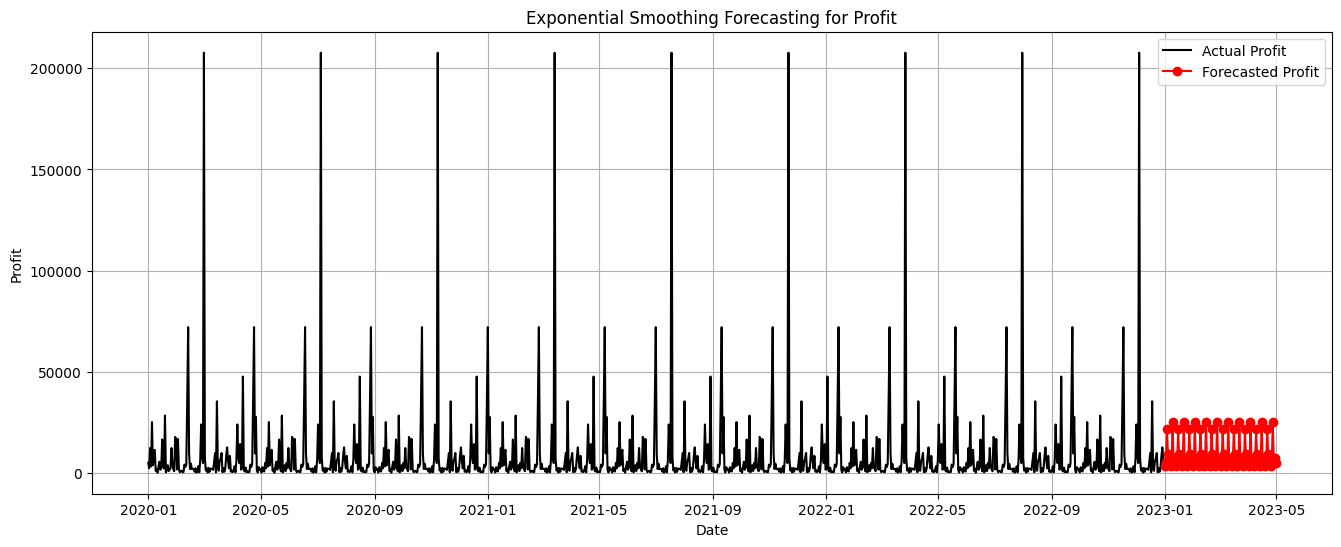

In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Set 'date' as the index for time series analysis
df.set_index('date', inplace=True)

data = df['profit'].tolist()

# Fit Exponential Smoothing model (Holt-Winters)
model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make predictions for the next period
forecast_steps = 120
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=forecast_steps, freq='D')
yhat = model_fit.predict(len(data), len(data) + forecast_steps - 1)

plt.figure(figsize=(16, 6))
plt.plot(df.index, df['profit'], label='Actual Profit', color='black')
plt.plot(forecast_index, yhat, marker='o', color='red', label='Forecasted Profit')
plt.title('Exponential Smoothing Forecasting for Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()


> **Forecasting Model Selection**

>Several forecasting models were considered, including but not limited to:
1.  Autoregressive Integrated Moving Average (ARIMA)
2.  Seasonal Decomposition of Time Series (STL)
3.  Exponential Smoothing State Space Models (ETS)

> The model selection process involved evaluating the performance of each model on the training data and selecting the one with the best fit.